<a href="https://colab.research.google.com/github/Priyabrat845/Topic-Modeling-on-News-Articles/blob/main/Topic_modeling_of_news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


#Eimport pyLDAvis.sklearn
#pyLDAvis.enable_notebook()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Import Data**

In [ ]:
path ="/content/drive/MyDrive/Almabetter/bbc"

In [ ]:
#Importing text file paths
business = glob.glob(path+'/business/*')
entertainment = glob.glob(path+'/entertainment/*')
politics = glob.glob(path+'/politics/*')
sports = glob.glob(path+'/sport/*')
tech = glob.glob(path+'/tech/*')

In [ ]:
business[0:5]

['/content/drive/MyDrive/Almabetter/bbc/business/003.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/001.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/002.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/024.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/004.txt']

In [ ]:
len(sports)

511

In [ ]:
sports_text=[]
try:
  for i in range(len(sports)):
    f=open(sports[i],errors='ignore')
    a=f.read()
    sports_text.append(a)
except:
  print('List ended !!')


In [ ]:
len(sports_text)

511

In [ ]:

sports_text=[]
try:
  for i in range(len(sports)):
    f=open(sports[i],'r')
    a=f.read()
    sports_text.append(a)
except:
  print('List ended !!')


List ended !!


In [ ]:
len(sports_text)

511

In [ ]:
sports_text

['Dibaba breaks 5,000m world record\n\nEthiopia\'s Tirunesh Dibaba set a new world record in winning the women\'s 5,000m at the Boston Indoor Games.\n\nDibaba won in 14 minutes 32.93 seconds to erase the previous world indoor mark of 14:39.29 set by another Ethiopian, Berhane Adera, in Stuttgart last year. But compatriot Kenenisa Bekele\'s record hopes were dashed when he miscounted his laps in the men\'s 3,000m and staged his sprint finish a lap too soon. Ireland\'s Alistair Cragg won in 7:39.89 as Bekele battled to second in 7:41.42. "I didn\'t want to sit back and get out-kicked," said Cragg. "So I kept on the pace. The plan was to go with 500m to go no matter what, but when Bekele made the mistake that was it. The race was mine." Sweden\'s Carolina Kluft, the Olympic heptathlon champion, and Slovenia\'s Jolanda Ceplak had winning performances, too. Kluft took the long jump at 6.63m, while Ceplak easily won the women\'s 800m in 2:01.52.\n',
 "2004: An Irish Athletics Year\n\n2004 wo

In [ ]:
def make_list(data):
    list = []
    for i in range(len(data)):
      file = open(data[i],'r')
      list.append(file.read())
    return(list)

In [ ]:
len(business)

510

In [ ]:
business_texts= make_list(business)
entertainment_text = make_list(entertainment)
politics_texts= make_list(politics)
#sport_texts= make_list(sports)
tech_text = make_list(tech)

In [ ]:
#Number of documents in every topics
print(len(business_texts),len(entertainment_text),len(politics_texts),len(sports_text),len(tech_text))

510 386 417 511 401


In [ ]:
complete_text = business_texts + entertainment_text + politics_texts + sports_text + tech_text

In [ ]:
len(complete_text)

2225

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 256kB 5.1MB/s 
     |████████████████████████████████| 10.1MB 17.7MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 112kB 51.8MB/s 
     |████████████████████████████████| 3.1MB 43.4MB/s 
     |████████████████████████████████| 645kB 38.9MB/s 
     |████████████████████████████████| 61kB 535kB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 296kB 43.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=16081066d4244ed816823d311f12cda476aed52494224f3d6d0a239ea91fd93a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=cc98ea2e5f1149290f07dad76b3de56ec1e2b03c0551bf387033e6ae4c7165bd
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

In [ ]:
data = pd.DataFrame({'Texts': complete_text})
#data.head()

In [ ]:
len(data)

2225

In [ ]:
data.head(5)

,Texts
0,Yukos unit buyer faces loan claim\n\nThe owner...
1,Ad sales boost Time Warner profit\n\nQuarterly...
2,Dollar gains on Greenspan speech\n\nThe dollar...
3,US trade gap hits record in 2004\n\nThe gap be...
4,High fuel prices hit BA's profits\n\nBritish A...


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Data Cleaning 
def text_processing(data):
  data = data.map(lambda x: x.replace('\n',' '))
  data = data.map(lambda x: x.lower())
  #data = data.map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  data = data.map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))
  return data

In [ ]:
data['Texts']= text_processing(data['Texts'])


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
data_split=data.copy()
data_split.head()

,Texts
0,yukos unit buyer faces loan claim owners emba...
1,ad sales boost time warner profit quarterly p...
2,dollar gains greenspan speech dollar hit high...
3,us trade gap hits record 2004 gap us exports ...
4,high fuel prices hit ba's profits british air...


In [ ]:
import spacy
sntc = data_split['Texts']
sntc_token = ''
for i in data_split['Texts']:
  nlp = spacy.load("en_core_web_sm")
  [sent.text for sent in nlp(str(sntc)).sents] 


In [ ]:
sntc[0]

'yukos unit buyer faces loan claim  owners embattled russian oil giant yukos ask buyer former production unit pay back $900m (£479m) loan.  state-owned rosneft bought yugansk unit $9.3bn sale forced russia part settle $27.5bn tax claim yukos. yukos\' owner menatep group says ask rosneft repay loan yugansk secured assets. rosneft already faces similar $540m repayment demand foreign banks. legal experts said rosneft\'s purchase yugansk would include obligations. "the pledged assets rosneft, pay real money creditors avoid seizure yugansk assets," said moscow-based us lawyer jamie firestone, connected case. menatep group\'s managing director tim osborne told reuters news agency: "if default, fight rule law exists international arbitration clauses credit."  rosneft officials unavailable comment. company said intends take action menatep recover tax claims debts owed yugansk. yukos filed bankruptcy protection us court attempt prevent forced sale main production arm. sale went ahead december y

In [ ]:
len(sntc)

2225

In [ ]:
print(type(sntc))

<class 'pandas.core.series.Series'>


In [ ]:
data_sent=pd.DataFrame({'Texts': sntc})

In [ ]:
len(data_sent)

2225

In [ ]:
data_sent.head(5)

,Texts
0,yukos unit buyer faces loan claim owners emba...
1,ad sales boost time warner profit quarterly p...
2,dollar gains greenspan speech dollar hit high...
3,us trade gap hits record 2004 gap us exports ...
4,high fuel prices hit ba's profits british air...


In [ ]:
data_sent['Texts'] = data_sent['Texts'].map(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [ ]:
data_sent['Texts'][0]

'yukos unit buyer faces loan claim  owners embattled russian oil giant yukos ask buyer former production unit pay back 900m £479m loan  stateowned rosneft bought yugansk unit 93bn sale forced russia part settle 275bn tax claim yukos yukos owner menatep group says ask rosneft repay loan yugansk secured assets rosneft already faces similar 540m repayment demand foreign banks legal experts said rosnefts purchase yugansk would include obligations the pledged assets rosneft pay real money creditors avoid seizure yugansk assets said moscowbased us lawyer jamie firestone connected case menatep groups managing director tim osborne told reuters news agency if default fight rule law exists international arbitration clauses credit  rosneft officials unavailable comment company said intends take action menatep recover tax claims debts owed yugansk yukos filed bankruptcy protection us court attempt prevent forced sale main production arm sale went ahead december yugansk sold littleknown shell compa

In [ ]:
data1=data.copy()

In [ ]:
data1.head(5)

,Texts
0,yukos unit buyer faces loan claim owners emba...
1,ad sales boost time warner profit quarterly p...
2,dollar gains greenspan speech dollar hit high...
3,us trade gap hits record 2004 gap us exports ...
4,high fuel prices hit bas profits british airw...


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

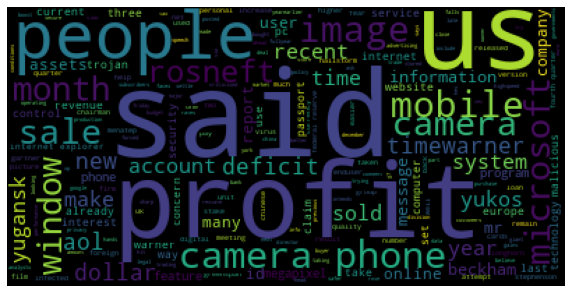

<Figure size 360x216 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
text = data1['Texts'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(5,3))
plt.show()

In [ ]:
data['Texts'][0]

'yukos unit buyer faces loan claim  owners embattled russian oil giant yukos ask buyer former production unit pay back 900m £479m loan  stateowned rosneft bought yugansk unit 93bn sale forced russia part settle 275bn tax claim yukos yukos owner menatep group says ask rosneft repay loan yugansk secured assets rosneft already faces similar 540m repayment demand foreign banks legal experts said rosnefts purchase yugansk would include obligations pledged assets rosneft pay real money creditors avoid seizure yugansk assets said moscowbased us lawyer jamie firestone connected case menatep groups managing director tim osborne told reuters news agency default fight rule law exists international arbitration clauses credit  rosneft officials unavailable comment company said intends take action menatep recover tax claims debts owed yugansk yukos filed bankruptcy protection us court attempt prevent forced sale main production arm sale went ahead december yugansk sold littleknown shell company turn

In [ ]:
import re
regex = re.compile('[^a-zA-Z]')

In [ ]:
def tokenize(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            clean_word = regex.sub('', word)
            tokens.append(clean_word.lower())
    return tokens

In [ ]:
tokenized = tokenize(data1['Texts'][0])
tokenized[:10]

['yukos',
 'unit',
 'buyer',
 'faces',
 'loan',
 'claim',
 'owners',
 'embattled',
 'russian',
 'oil']